# *******************************THE SPARKS FOUNDATION**



###                                                          **TASK2- Exam- Score Foundation**





# **    AKASH YADAV     ** 






# **Linear Regression with Python Scikit Learn**
In this regression task we need predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [33]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import requests

In [34]:
# Accessing the dataset and storing it in a pandas dataframe

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [35]:
# Display the top 5 observations from the dataframe

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
# Shape of the dataframe (25 rows, 2 columns)

df.shape

(25, 2)

In [38]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
# Checking the Datatypes

df.dtypes

Hours     float64
Scores      int64
dtype: object

In [40]:
# Checking for null values

df.isna().sum()

Hours     0
Scores    0
dtype: int64

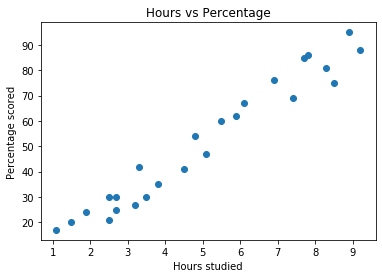

In [64]:
# Plotting a scatter graph (Hours-studies vs Percentage scored)

plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.title('Hours vs Percentage')
plt.show();

### From the graph we conclude that there is a positive linear relation between the no. of hours studied and the score obtained

## Preparing the data

In [43]:
x=df.drop('Scores', axis=1)
y=df.Scores

In [44]:
x.shape, y.shape

((25, 1), (25,))

In [45]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [46]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [67]:
# Splitting our data into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [68]:
x_train.shape, x_test.shape

((20, 1), (5, 1))

## Training our model

In [69]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
regressor.score(x_test, y_test)

0.9678055545167994

## To obtain best fitted line

In [52]:
regressor.intercept_

2.826892353899737

In [53]:
regressor.coef_

array([9.68207815])

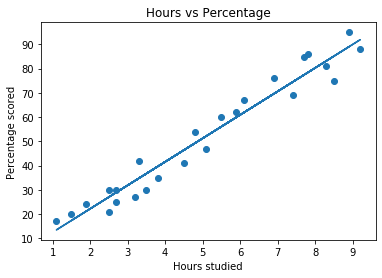

In [54]:
# We know eauation of a straight line is  y=mx+c, where m=slope and c=intercept

Y=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,Y)
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.title('Hours vs Percentage');

## Making predictions

In [55]:
y_pred=regressor.predict(x_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [72]:
# Comparing the Actual scores and the predicted scores

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Evaluating our model

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 score:  0.9678055545167994


## What will be the predicted score, if a student study for 9.25 hours in a day?

In [60]:
print('Hours Studied: ', 9.25)
print('Predicted score: ',regressor.predict([[9.25]])[0])

Hours Studied:  9.25
Predicted score:  92.38611528261494


## According to the model, if a student study for 9.25 hours in a day, he/she can score 92.38 % score  